# Ensemble Learning using the UCI Wine Quality Dataset

The following code is a demonstration of ensemble learning using the UCI Wine Quality Dataset, which normally requires random forest.

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

In [ ]:
# Installing the prerequisites (if we haven't already)
# If you're using Colab or project IDX, this is done for you already
%pip install ucimlrepo seaborn numpy pandas matplotlib scikit-learn certifi statsmodels

# Imports and dataset initialisation
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fetch datasset
wq = fetch_ucirepo(id=186)

Note: you may need to restart the kernel to use updated packages.


## Processing the Data

In [ ]:
# print out the features first as seen  in the UCI python example
print(wq.metadata)
print(wq.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
# ucimlrepo has converted our dataset into a dictionary with dot notation
# so no processing needed, just need to initialise the variables now
# See: https://github.com/uci-ml-repo/ucimlrepo/blob/main/src/ucimlrepo/fetch.py
x = wq.data.features
y = wq.data.targets

In [ ]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
features = wq.variables[wq.variables['role'] == 'Feature']['name'].tolist()
data = pd.DataFrame(x, columns=features)

data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


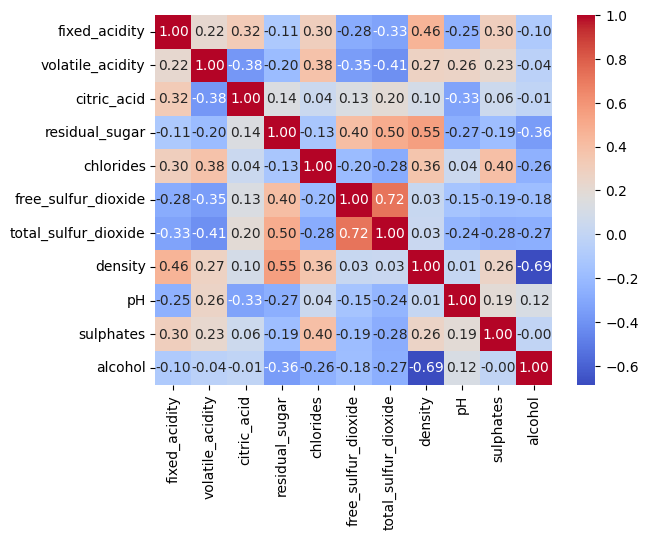

In [ ]:
# Graph the correlations on the features
cr = wq.data.features.corr()
sns.heatmap(cr, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

## Training

In [ ]:
# Split training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalise the y axis
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [ ]:
rfe = RFE(estimator=LogisticRegression(max_iter=8096), n_features_to_select=10)

rfe.fit(x_train, y_train)

/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(max_iter=8096), n_features_to_select=10)

In [ ]:
# Select features
x_train_sel = rfe.transform(x_train)
x_test_sel = rfe.transform(x_test)

# create new data frame with selected features
data_sel = pd.DataFrame(x_train_sel, columns=[features[i] for i, sel in enumerate(rfe.support_) if sel])

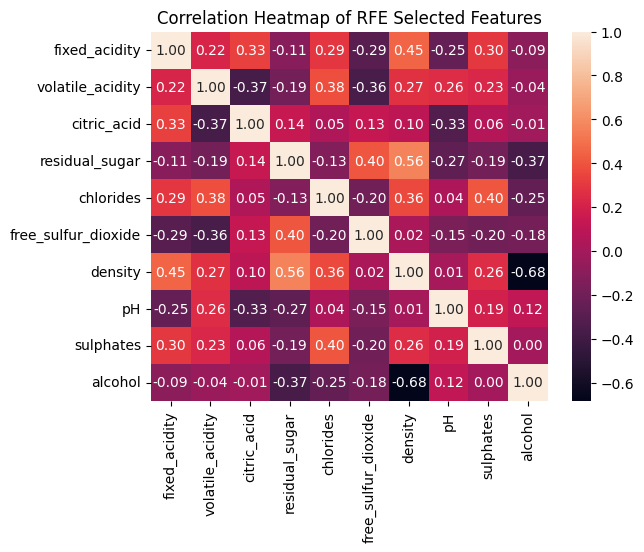

In [ ]:
# Correlation map for selected features
cr_sel = data_sel.corr()
sns.heatmap(cr_sel, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of RFE Selected Features")
plt.show()

In [ ]:
# Define all the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),

}

In [ ]:
# Ensure y_test is equal length to x_test
y_test = y_test[:len(x_test)]

In [ ]:
# Train and evaluate all models

res_all = {}

for n, m in models.items():
    m.fit(x_train, y_train)
    predictions = m.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    res_all[n] = accuracy


/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train and evaluate all models (RFE-selected)

res_all_sel = {}

for n, m in models.items():
    m.fit(x_train_sel, y_train)
    predictions = m.predict(x_test_sel)
    accuracy = accuracy_score(y_test, predictions)
    res_all_sel[n] = accuracy


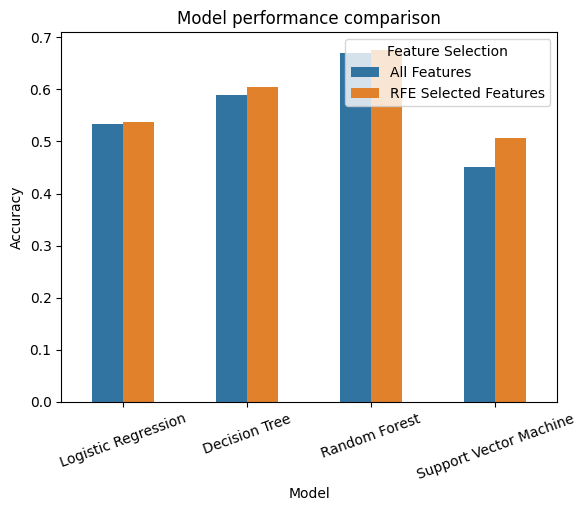

In [ ]:
res_df = pd.DataFrame({
    "Model": list(res_all.keys()) + list(res_all_sel.keys()),
    "Accuracy": list(res_all.values()) + list(res_all_sel.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

# Plot the dataframe
sns.barplot(x="Model", y="Accuracy", hue="Feature Selection", data=res_df, width=0.5)
plt.title("Model performance comparison")
plt.xticks(rotation=20)
plt.yticks(fontsize=10)
plt.show()

## Evaluation

In [ ]:
# Train and evaluate all models

res_all = {}

for n, m in models.items():
    m.fit(x_train, y_train)
    predictions = m.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    res_all[n] = accuracy

# Print scores
print("Scores for all models (no RFE):")
for n, a in res_all.items():
    print(f"{n}: {a * 100:2f}%")

/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scores for all models (no RFE):
Logistic Regression: 53.384615%
Decision Tree: 59.000000%
Random Forest: 67.000000%
Support Vector Machine: 45.076923%


In [ ]:
# Train and evaluate all models

res_all_sel = {}

for n, m in models.items():
    m.fit(x_train_sel, y_train)
    predictions = m.predict(x_test_sel)
    accuracy = accuracy_score(y_test, predictions)
    res_all_sel[n] = accuracy

# Print scores
print("Scores for all models (with RFE):")
for n, a in res_all.items():
    print(f"{n}: {a * 100:2f}%")

Scores for all models (with RFE):
Logistic Regression: 53.384615%
Decision Tree: 59.000000%
Random Forest: 67.000000%
Support Vector Machine: 45.076923%


In [ ]:
# Map the features
all_feats = data.columns
elim_feats = all_feats[~rfe.support_]
selected_feats = all_feats[rfe.support_]

print(f"Eliminated features: {elim_feats}\n\nSelected features: {selected_feats}")

Eliminated features: Index(['total_sulfur_dioxide'], dtype='object')

Selected features: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


In [ ]:
# Do we know what's the highest performing model?
best_performing_model_name = max(res_all, key=res_all.get)
best_performing_model = models[best_performing_model_name]

In [ ]:
# Re-train the best performing model using the RFE selected features.
best_performing_model.fit(x_train_sel, y_train)
highest_acc = best_performing_model.score(x_test_sel, y_test)

In [ ]:
# Use ensemble techniques paired with the best performing model
# to improve the performance of the model

# Stacking Classifier
stacking_mdl = StackingClassifier(estimators=[("highest_model", best_performing_model)], final_estimator=LogisticRegression(max_iter=1000))
stacking_mdl.fit(x_train_sel, y_train)


/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(estimators=[('highest_model',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Adaboost Classifier (with Hyperparameter fine-tuning)
# Hyperparameter tuning

ada_mdl = AdaBoostClassifier(estimator=best_performing_model, learning_rate=0.1, n_estimators=100, random_state=42)
ada_mdl.fit(x_train_sel, y_train.ravel())

/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
# Adaboost Classifier (with Hyperparameter fine-tuning)
# Hyperparameter tuning

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_ht_mdl = GridSearchCV(AdaBoostClassifier(estimator=best_performing_model, random_state=42), ada_param_grid, cv=5, scoring='accuracy')
ada_ht_mdl.fit(x_train_sel, y_train.ravel())

/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/ml-playground/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.war

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Bagging Classifier
bagging_mdl = BaggingClassifier(estimator=best_performing_model, n_estimators=100)
bagging_mdl.fit(x_train_sel, y_train.ravel())

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100)

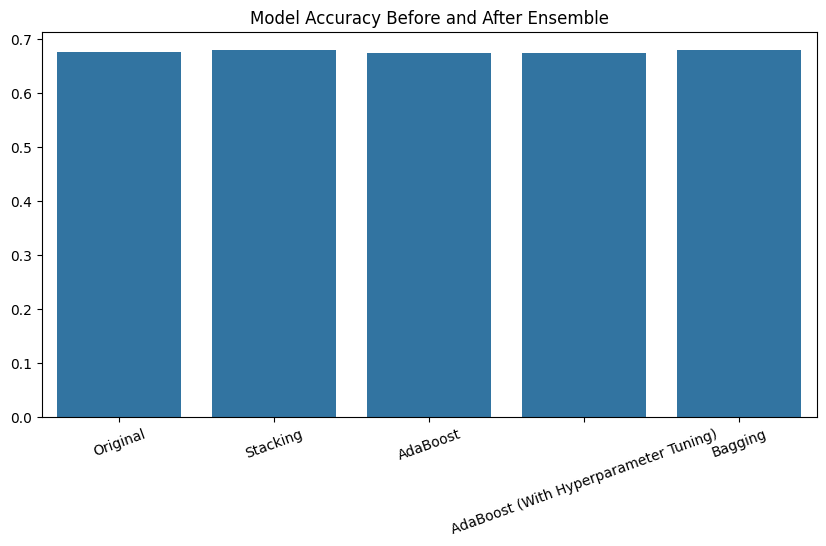

Original : 0.6762
Stacking : 0.6800
AdaBoost : 0.6746
AdaBoost (With Hyperparameter Tuning) : 0.6746
Bagging : 0.6800


In [ ]:
# Graph their performance
model_perf = {
    "Original": highest_acc,
    "Stacking": stacking_mdl.score(x_test_sel, y_test),
    "AdaBoost": ada_mdl.score(x_test_sel, y_test),
    "AdaBoost (With Hyperparameter Tuning)": ada_ht_mdl.score(x_test_sel, y_test),
    "Bagging": bagging_mdl.score(x_test_sel, y_test)
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_perf.keys()), y=list(model_perf.values()))
plt.xticks(rotation=20)
plt.yticks(fontsize=10)
plt.title("Model Accuracy Before and After Ensemble")
plt.show()

# Print their accuracies too
for model, acc in model_perf.items():
    print(f"{model} : {acc:.4f}")

### Removing Outliers and Multicollinearity

In [ ]:
# Make a copy of the original dataframe
data_tgt = data
data_tgt['target'] = y


In [ ]:
# Remove the outliers
q1 = data_tgt.drop(columns=['target']).quantile(0.25)
q3 = data_tgt.drop(columns=['target']).quantile(0.75)
iqr = q3 - q1

# Create a new dataframe without outliers
data_no_outliers = data_tgt[~((data_tgt.drop(columns=['target']) < (q1 - 1.5 * iqr)) | (data_tgt.drop(columns=['target']) > (q3 + 1.5 * iqr))).any(axis=1)]

In [ ]:
# If there are any infinite values, replace them with a NaN
imputer = SimpleImputer(strategy="mean")
x_imputed = imputer.fit_transform(x)
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

x_imputed[~np.isfinite(x_imputed)] = np.nan

# Then drop the NaN values afterwards
data_no_missing = data.dropna()

def calculate_vif(x, threshold=5.0):
    dropped = False
    vars = list(range(x.shape[1]))
    while dropped:
        dropped = True
        vif = [variance_inflation_factor(x, ix) for ix in range(x.shape[1])]
        max_vif = max(vif)
        if max_vif > threshold:
            maxloc = vif.index(max_vif)
            print(f"Dropping {x.iloc[:, vars].columns[maxloc]} with VIF={max_vif}")
            x = np.delete(x, maxloc, axis=1)
            vars.remove(maxloc)
            dropped = True
    print(f"Remaining variables: {vars}")
    return x


# create a dataframe without the multicollinearity
data_no_multicollinearity = calculate_vif(data_no_missing)

Remaining variables: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


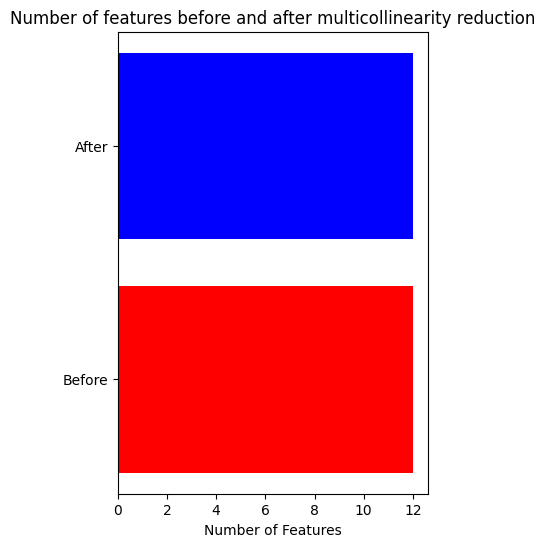

In [ ]:
# Plot the differences between a "cleaned" data with no multicollinearity and the original

f, a = plt.subplots(figsize=(4, 6))
a.barh(['Before', 'After'], [data.shape[1], data_no_multicollinearity.shape[1]], color=['red', 'blue'])
a.set_xlabel('Number of Features')
a.set_title('Number of features before and after multicollinearity reduction')
plt.show()